In [1]:
from model import TwoLayerConv
from dataset import CSVLoader, UnNormalize
from train import train_model
from eval import evaluate
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch

## User model, loss function, optimizer, and hyper-parameters

In [2]:
# Hyper-parameters
epochs     = 50
lr         = 0.001
batch_size = 32

# Model, Loss_fn, and Optimizer
model      = TwoLayerConv()
criterion  = torch.nn.CrossEntropyLoss()
optimizer  = torch.optim.Adam(params = model.parameters(), lr = lr)
device     = torch.device('cuda:3')

## Load the data and create dataloaders

In [3]:
cifar_mu = [0.49139968, 0.48215827, 0.44653124]
cifar_sd = [0.24703233, 0.24348505, 0.26158768]

tf = transforms.Compose([transforms.ToTensor(),
                         transforms.Normalize(mean = cifar_mu, std = cifar_sd),
                         transforms.RandomHorizontalFlip()
                         ])

tf_test = transforms.Compose([transforms.ToTensor(),
                         transforms.Normalize(mean = cifar_mu, std = cifar_sd)
                         ])


# Downloaded from pytorch
dataset = datasets.CIFAR10(root='data/', download = True, transform = tf)
test_dataset = datasets.CIFAR10(root='data/', train = False, transform = tf_test)

train_dataset, val_dataset = random_split(dataset, [45000, 5000])

train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True, num_workers = 4)
val_loader   = DataLoader(val_dataset, batch_size = batch_size, shuffle = False, num_workers = 4)
test_loader  = DataLoader(test_dataset, batch_size = batch_size, shuffle = False, num_workers = 4)

Files already downloaded and verified


## Example Images

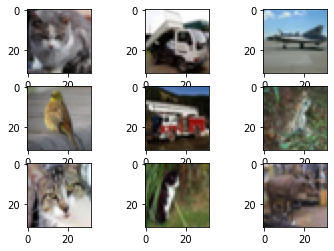

In [4]:
im_tr = transforms.Compose([UnNormalize(cifar_mu, cifar_sd),
                            transforms.ToPILImage()])

images = next(iter(train_loader))[0]
_, ax = plt.subplots(3, 3)

counter = 0
for i in range(3):
    for j in range(3):
        
        image = im_tr(images[counter])
        ax[i, j].imshow(image)
        counter += 1

## Tranining Begins!

In [5]:
model, losses, accuracies, val_losses, val_accuracies = train_model(model, epochs, train_loader,
 val_loader, optimizer, criterion, device, track_loss = True)

Epoch 1


100%|██████████| 1407/1407 [00:03<00:00, 369.49it/s]


Epoch 2


100%|██████████| 1407/1407 [00:05<00:00, 270.19it/s]


Epoch 3


100%|██████████| 1407/1407 [00:03<00:00, 368.30it/s]


Epoch 4


100%|██████████| 1407/1407 [00:03<00:00, 399.78it/s]


Epoch 5


100%|██████████| 1407/1407 [00:04<00:00, 307.83it/s]

Loss:  1481.4917205572128 Accuracy:  0.6290445


Val Loss:  172.57824385166168 Val Accuracy:  0.61219996
Epoch 6


100%|██████████| 1407/1407 [00:03<00:00, 357.16it/s]


Epoch 7


100%|██████████| 1407/1407 [00:05<00:00, 249.83it/s]


Epoch 8


100%|██████████| 1407/1407 [00:03<00:00, 382.82it/s]


Epoch 9


100%|██████████| 1407/1407 [00:03<00:00, 412.85it/s]


Epoch 10


100%|██████████| 1407/1407 [00:05<00:00, 280.88it/s]

Loss:  1239.3579331338406 Accuracy:  0.6888222


Val Loss:  155.9208003282547 Val Accuracy:  0.6562
Epoch 11


100%|██████████| 1407/1407 [00:04<00:00, 285.42it/s]


Epoch 12


100%|██████████| 1407/1407 [00:03<00:00, 351.88it/s]


Epoch 13


100%|██████████| 1407/1407 [00:05<00:00, 275.55it/s]


Epoch 14


100%|██████████| 1407/1407 [00:05<00:00, 275.38it/s]


Epoch 15


100%|██████████| 1407/1407 [00:04<00:00, 291.45it/s]

Loss:  1138.0134353637695 Accuracy:  0.71393335


Val Loss:  157.82997488975525 Val Accuracy:  0.6604
Epoch 16


100%|██████████| 1407/1407 [00:05<00:00, 235.94it/s]


Epoch 17


100%|██████████| 1407/1407 [00:05<00:00, 265.30it/s]


Epoch 18


100%|██████████| 1407/1407 [00:04<00:00, 288.20it/s]


Epoch 19


100%|██████████| 1407/1407 [00:05<00:00, 239.99it/s]


Epoch 20


100%|██████████| 1407/1407 [00:04<00:00, 282.39it/s]

Loss:  1056.5549888014793 Accuracy:  0.73502225


Val Loss:  162.7902137041092 Val Accuracy:  0.6536
Epoch 21


100%|██████████| 1407/1407 [00:05<00:00, 268.00it/s]


Epoch 22


100%|██████████| 1407/1407 [00:05<00:00, 234.81it/s]


Epoch 23


100%|██████████| 1407/1407 [00:05<00:00, 269.40it/s]


Epoch 24


100%|██████████| 1407/1407 [00:05<00:00, 277.83it/s]


Epoch 25


100%|██████████| 1407/1407 [00:05<00:00, 247.96it/s]

Loss:  995.4031093865633 Accuracy:  0.7476889


Val Loss:  167.49311822652817 Val Accuracy:  0.6538
Epoch 26


100%|██████████| 1407/1407 [00:04<00:00, 323.92it/s]


Epoch 27


100%|██████████| 1407/1407 [00:04<00:00, 281.51it/s]


Epoch 28


100%|██████████| 1407/1407 [00:05<00:00, 264.44it/s]


Epoch 29


100%|██████████| 1407/1407 [00:05<00:00, 269.59it/s]


Epoch 30


100%|██████████| 1407/1407 [00:04<00:00, 290.30it/s]

Loss:  954.1846410483122 Accuracy:  0.7566889


Val Loss:  168.25575348734856 Val Accuracy:  0.66099995
Epoch 31


100%|██████████| 1407/1407 [00:04<00:00, 303.72it/s]


Epoch 32


100%|██████████| 1407/1407 [00:05<00:00, 235.92it/s]


Epoch 33


100%|██████████| 1407/1407 [00:04<00:00, 287.77it/s]


Epoch 34


100%|██████████| 1407/1407 [00:05<00:00, 256.67it/s]


Epoch 35


100%|██████████| 1407/1407 [00:04<00:00, 290.18it/s]

Loss:  912.2240465730429 Accuracy:  0.7696667


Val Loss:  173.75231286883354 Val Accuracy:  0.653
Epoch 36


100%|██████████| 1407/1407 [00:04<00:00, 305.60it/s]


Epoch 37


100%|██████████| 1407/1407 [00:04<00:00, 313.67it/s]


Epoch 38


100%|██████████| 1407/1407 [00:05<00:00, 259.20it/s]


Epoch 39


100%|██████████| 1407/1407 [00:05<00:00, 279.75it/s]


Epoch 40


100%|██████████| 1407/1407 [00:05<00:00, 275.01it/s]

Loss:  873.9667577594519 Accuracy:  0.77815557


Val Loss:  171.32263246178627 Val Accuracy:  0.6662
Epoch 41


100%|██████████| 1407/1407 [00:05<00:00, 253.27it/s]


Epoch 42


100%|██████████| 1407/1407 [00:03<00:00, 370.50it/s]


Epoch 43


100%|██████████| 1407/1407 [00:05<00:00, 277.13it/s]


Epoch 44


100%|██████████| 1407/1407 [00:04<00:00, 295.49it/s]


Epoch 45


100%|██████████| 1407/1407 [00:04<00:00, 283.92it/s]

Loss:  849.6608864665031 Accuracy:  0.7858


Val Loss:  179.85932484269142 Val Accuracy:  0.6556
Epoch 46


100%|██████████| 1407/1407 [00:05<00:00, 235.58it/s]


Epoch 47


100%|██████████| 1407/1407 [00:05<00:00, 243.24it/s]


Epoch 48


100%|██████████| 1407/1407 [00:05<00:00, 262.49it/s]


Epoch 49


100%|██████████| 1407/1407 [00:06<00:00, 222.34it/s]


Epoch 50


100%|██████████| 1407/1407 [00:05<00:00, 241.47it/s]

Loss:  818.9632552564144 Accuracy:  0.7916667


Val Loss:  191.94202250242233 Val Accuracy:  0.6464


## Evalute Model on Test Set

In [6]:
loss, accuracy = evaluate(model, test_loader, criterion, device)
accuracy * 100

64.31999802589417

## Plot Accuracies and Losses

Text(0.5, 1.0, 'Accuracies')

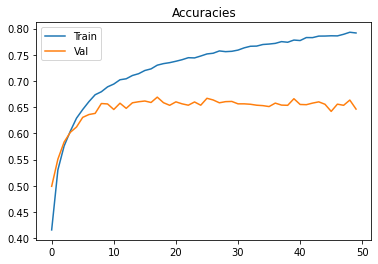

In [7]:
plt.plot(accuracies, label = 'Train')
plt.legend()
plt.plot(val_accuracies, label = 'Val')
plt.legend()
plt.title('Accuracies')

Text(0.5, 1.0, 'Losses')

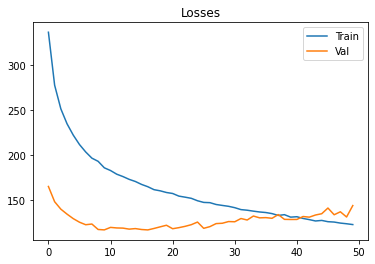

In [8]:
plt.plot([loss * .15 for loss in losses], label = 'Train')
plt.legend()
plt.plot([val_loss * .75 for val_loss in val_losses], label = 'Val')
plt.legend()
plt.title('Losses')